In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_excel("/content/weather data (1) (1).xlsx")

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   INDEX    7305 non-null   int64         
 1   DATE     7305 non-null   datetime64[ns]
 2   DT       7305 non-null   int64         
 3   MN       7305 non-null   int64         
 4   YEAR     7305 non-null   int64         
 5   MAXTEMP  7253 non-null   float64       
 6   MINTEMP  7252 non-null   float64       
 7   MWSP     7254 non-null   float64       
 8   RF       7228 non-null   float64       
 9   EVP      7228 non-null   float64       
 10  ET       7228 non-null   float64       
 11  SSH      7228 non-null   float64       
 12  RH1      7228 non-null   float64       
 13  RH2      7228 non-null   float64       
 14  Name     7305 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(4), object(1)
memory usage: 856.2+ KB


INDEX       0
DATE        0
DT          0
MN          0
YEAR        0
MAXTEMP    52
MINTEMP    53
MWSP       51
RF         77
EVP        77
ET         77
SSH        77
RH1        77
RH2        77
Name        0
dtype: int64

Time-based interpolation: Since your dataset has a time component, you can perform time-based interpolation to estimate missing values for attributes that exhibit a temporal pattern. Utilize the values from neighboring time points to infer the missing values.

In [ ]:
# Ensure that the 'DT' column is in datetime format for proper interpolation

# Sort the DataFrame by the 'DT' column in ascending order
df.sort_values('DATE', inplace=True)

# Perform forward fill interpolation
df['MAXTEMP'].interpolate(method='ffill', inplace=True)
df['MINTEMP'].interpolate(method='ffill', inplace=True)
df['MWSP'].interpolate(method='ffill', inplace=True)
df['RF'].interpolate(method='ffill', inplace=True)
df['EVP'].interpolate(method='ffill', inplace=True)
df['ET'].interpolate(method='ffill', inplace=True)
df['SSH'].interpolate(method='ffill', inplace=True)
df['RH1'].interpolate(method='ffill', inplace=True)
df['RH2'].interpolate(method='ffill', inplace=True)

# Perform backward fill interpolation
df['MAXTEMP'].interpolate(method='bfill', inplace=True)
df['MINTEMP'].interpolate(method='bfill', inplace=True)
df['MWSP'].interpolate(method='bfill', inplace=True)
df['RF'].interpolate(method='bfill', inplace=True)
df['EVP'].interpolate(method='bfill', inplace=True)
df['ET'].interpolate(method='bfill', inplace=True)
df['SSH'].interpolate(method='bfill', inplace=True)
df['RH1'].interpolate(method='bfill', inplace=True)
df['RH2'].interpolate(method='bfill', inplace=True)

# You can also perform a combination of forward and backward fill by using 'pad' and 'backfill' methods

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(df)

      INDEX       DATE  DT  MN  YEAR  MAXTEMP  MINTEMP  MWSP   RF  EVP   ET  \
0     43118 2002-01-01   1   1  2002     28.7     14.5   9.3  0.0  4.8  1.3   
1     43118 2002-01-02   2   1  2002     29.0     13.3  10.6  0.0  5.2  1.6   
2     43118 2002-01-03   3   1  2002     28.5     12.0   9.6  0.0  6.0  1.8   
3     43118 2002-01-04   4   1  2002     28.0     11.4  13.5  0.0  5.9  1.6   
4     43118 2002-01-05   5   1  2002     28.5     15.4  18.9  0.0  6.5  1.5   
...     ...        ...  ..  ..   ...      ...      ...   ...  ...  ...  ...   
7300  43118 2021-12-27  27  12  2021     31.7     15.2  12.7  0.0  4.4  1.7   
7301  43118 2021-12-28  28  12  2021     31.6     16.5  12.7  0.0  4.3  1.7   
7302  43118 2021-12-29  29  12  2021     30.9     15.7  12.9  0.0  4.5  1.7   
7303  43118 2021-12-30  30  12  2021     30.3     16.8  12.5  0.0  4.1  1.8   
7304  43118 2021-12-31  31  12  2021     30.2     15.5  11.8  0.0  4.9  1.8   

      SSH   RH1   RH2     Name  
0     8.1  60.0  4

In [ ]:
df.isnull().sum()

INDEX      0
DATE       0
DT         0
MN         0
YEAR       0
MAXTEMP    0
MINTEMP    0
MWSP       0
RF         0
EVP        0
ET         0
SSH        0
RH1        0
RH2        0
Name       0
dtype: int64

In [ ]:
# Drop a column by index
df = df.drop(df.columns[0], axis=1)

In [ ]:
# Convert int64 attributes to float64
df['DT'] = df['DT'].astype(float)
df['MN'] = df['MN'].astype(float)
df['YEAR'] = df['YEAR'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     7305 non-null   datetime64[ns]
 1   DT       7305 non-null   float64       
 2   MN       7305 non-null   float64       
 3   YEAR     7305 non-null   float64       
 4   MAXTEMP  7305 non-null   float64       
 5   MINTEMP  7305 non-null   float64       
 6   MWSP     7305 non-null   float64       
 7   RF       7305 non-null   float64       
 8   EVP      7305 non-null   float64       
 9   ET       7305 non-null   float64       
 10  SSH      7305 non-null   float64       
 11  RH1      7305 non-null   float64       
 12  RH2      7305 non-null   float64       
 13  Name     7305 non-null   object        
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 799.1+ KB


In [ ]:
# Adding TEMP and RH columns
df['TEMP'] = (df['MAXTEMP'] + df['MINTEMP']) / 2
df = df.drop(['MAXTEMP', 'MINTEMP'], axis=1)

df['RH'] = (df['RH1'] + df['RH2']) / 2
df = df.drop(['RH1', 'RH2'], axis=1)

df = df.drop(['SSH'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    7305 non-null   datetime64[ns]
 1   DT      7305 non-null   float64       
 2   MN      7305 non-null   float64       
 3   YEAR    7305 non-null   float64       
 4   MWSP    7305 non-null   float64       
 5   RF      7305 non-null   float64       
 6   EVP     7305 non-null   float64       
 7   ET      7305 non-null   float64       
 8   Name    7305 non-null   object        
 9   TEMP    7305 non-null   float64       
 10  RH      7305 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 627.9+ KB


In [ ]:
df

,DATE,DT,MN,YEAR,MWSP,RF,EVP,ET,Name,TEMP,RH
0,2002-01-01,1.0,1.0,2002.0,9.3,0.0,4.8,1.3,SORGHUM,21.60,50.0
1,2002-01-02,2.0,1.0,2002.0,10.6,0.0,5.2,1.6,SORGHUM,21.15,56.5
2,2002-01-03,3.0,1.0,2002.0,9.6,0.0,6.0,1.8,SORGHUM,20.25,48.5
3,2002-01-04,4.0,1.0,2002.0,13.5,0.0,5.9,1.6,SORGHUM,19.70,47.5
4,2002-01-05,5.0,1.0,2002.0,18.9,0.0,6.5,1.5,SORGHUM,21.95,59.0
...,...,...,...,...,...,...,...,...,...,...,...
7300,2021-12-27,27.0,12.0,2021.0,12.7,0.0,4.4,1.7,GRAM,23.45,56.5
7301,2021-12-28,28.0,12.0,2021.0,12.7,0.0,4.3,1.7,GRAM,24.05,63.0
7302,2021-12-29,29.0,12.0,2021.0,12.9,0.0,4.5,1.7,GRAM,23.30,63.0
7303,2021-12-30,30.0,12.0,2021.0,12.5,0.0,4.1,1.8,GRAM,23.55,63.5


In [ ]:
# Assuming 'df' is your DataFrame
zero_count = (df['RF'] == 0).sum()
print("Count of zeros in 'RF' attribute:", zero_count)


Count of zeros in 'RF' attribute: 5981


take mean of maxtemp, mintemp and rh1, rh2 in excel then follow the steps of bookmarked lstm code.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
weather_data = df

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming your weather data is stored in a DataFrame called 'weather_data'
# Assuming the feature matrix is stored in 'X' and the target variable is stored in 'y'
X = weather_data.drop(['Name'], axis=1)  # Features without the target variable and datetime column
y = weather_data['Name']  # Target variable

# Split the data into training and validation based on the date
train_end_date = pd.to_datetime('2021-03-31')
val_start_date = pd.to_datetime('2021-04-01')
val_end_date = pd.to_datetime('2021-12-31')

X_train = X[X['DATE'] <= train_end_date].drop(['DATE'], axis=1)
y_train = y[X['DATE'] <= train_end_date]
X_val = X[(X['DATE'] >= val_start_date) & (X['DATE'] <= val_end_date)].drop(['DATE'], axis=1)
y_val = y[(X['DATE'] >= val_start_date) & (X['DATE'] <= val_end_date)]

# Create an instance of the SMOTE oversampler
smote = SMOTE()

# Perform SMOTE oversampling on the training data only
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the oversampled training data
columns = list(X_train.columns)
oversampled_data_train = pd.concat([pd.DataFrame(X_train_oversampled, columns=columns), pd.DataFrame(y_train_oversampled, columns=['Name'])], axis=1)

# Print the class counts in the oversampled training data
print(oversampled_data_train['Name'].value_counts())

# Now you can use the oversampled training data (X_train_oversampled, y_train_oversampled)
# and the validation data (X_val, y_val) for your model training and evaluation

SORGHUM      3730
BARE SOIL    3730
BLACKGRAM    3730
SAFFLOWER    3730
GRAM         3730
SUNFLOWER    3730
Name: Name, dtype: int64


In [ ]:
np.unique(y_val)

array(['BARE SOIL', 'GRAM', 'SUNFLOWER'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_oversampled)
X_val_scaled = scaler.transform(X_val)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_oversampled)
y_val_encoded = label_encoder.transform(y_val)

# Define the base model
base_model = RandomForestClassifier()

# Create the AdaBoost ensemble model
ensemble_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=100)

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train_encoded)

# Make predictions on the validation data
y_val_pred = ensemble_model.predict(X_val_scaled)

# Decode the predicted labels
y_val_pred_decoded = label_encoder.inverse_transform(y_val_pred)

# Calculate the accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred_decoded)
print("Validation Accuracy:", validation_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation Accuracy: 0.9272727272727272


['BARE SOIL' 'GRAM' 'SUNFLOWER']


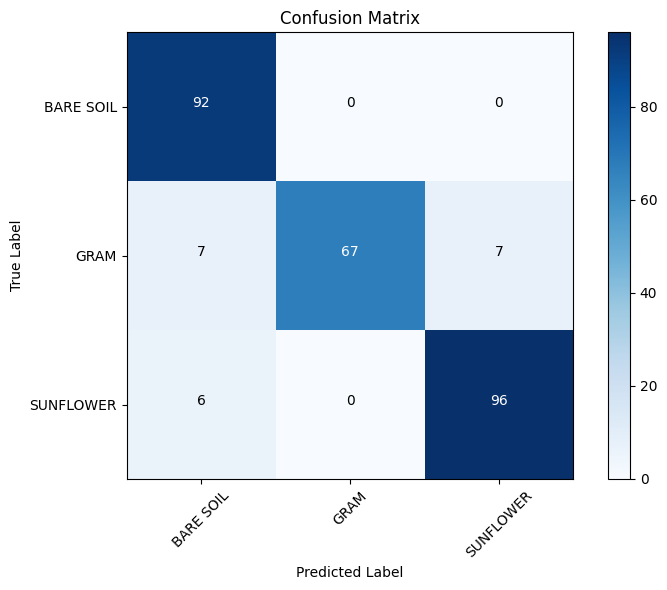

              precision    recall  f1-score   support

   BARE SOIL       0.88      1.00      0.93        92
        GRAM       1.00      0.83      0.91        81
   SUNFLOWER       0.93      0.94      0.94       102

    accuracy                           0.93       275
   macro avg       0.94      0.92      0.93       275
weighted avg       0.93      0.93      0.93       275



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have your target variable stored in a variable called 'y_val'
classes = np.unique(y_val)
print(classes)
# Create the confusion matrix
cm = confusion_matrix(y_val, y_val_pred_decoded)

# Create the classification report
report = classification_report(y_val, y_val_pred_decoded, target_names=classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Print the classification report
print(report)